# Implementing a Neural Network
In this exercise we will develop a neural network with fully-connected layers to perform classification, and test it out on the CIFAR-10 dataset.

In [31]:
# A bit of setup

import numpy as np
import matplotlib.pyplot as plt

from cs231n.classifiers.neural_net import TwoLayerNet

#from __future__ import print_function

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

def rel_error(x, y):
    """ returns relative error """
    return np.max(np.abs(x - y) / (np.maximum(1e-8, np.abs(x) + np.abs(y))))

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


We will use the class `TwoLayerNet` in the file `cs231n/classifiers/neural_net.py` to represent instances of our network. The network parameters are stored in the instance variable `self.params` where keys are string parameter names and values are numpy arrays. Below, we initialize toy data and a toy model that we will use to develop your implementation.

In [33]:
# Create a small net and some toy data to check your implementations.
# Note that we set the random seed for repeatable experiments.

input_size = 4
hidden_size = 10
num_classes = 3
num_inputs = 5

def init_toy_model():
    np.random.seed(0)
    return TwoLayerNet(input_size, hidden_size, num_classes, std=1e-1)

def init_toy_data():
    np.random.seed(1)
    X = 10 * np.random.randn(num_inputs, input_size)
    y = np.array([0, 1, 2, 2, 1])
    return X, y

net = init_toy_model()
X, y = init_toy_data()

# Forward pass: compute scores
Open the file `cs231n/classifiers/neural_net.py` and look at the method `TwoLayerNet.loss`. This function is very similar to the loss functions you have written for the SVM and Softmax exercises: It takes the data and weights and computes the class scores, the loss, and the gradients on the parameters. 

Implement the first part of the forward pass which uses the weights and biases to compute the scores for all inputs.

In [34]:
scores = net.loss(X)
print('Your scores:')
print(scores)
print()
print('correct scores:')
correct_scores = np.asarray([
  [-0.81233741, -1.27654624, -0.70335995],
  [-0.17129677, -1.18803311, -0.47310444],
  [-0.51590475, -1.01354314, -0.8504215 ],
  [-0.15419291, -0.48629638, -0.52901952],
  [-0.00618733, -0.12435261, -0.15226949]])
print(correct_scores)
print()

# The difference should be very small. We get < 1e-7
print('Difference between your scores and correct scores:')
print(np.sum(np.abs(scores - correct_scores)))

Your scores:
[[-0.81233741 -1.27654624 -0.70335995]
 [-0.17129677 -1.18803311 -0.47310444]
 [-0.51590475 -1.01354314 -0.8504215 ]
 [-0.15419291 -0.48629638 -0.52901952]
 [-0.00618733 -0.12435261 -0.15226949]]

correct scores:
[[-0.81233741 -1.27654624 -0.70335995]
 [-0.17129677 -1.18803311 -0.47310444]
 [-0.51590475 -1.01354314 -0.8504215 ]
 [-0.15419291 -0.48629638 -0.52901952]
 [-0.00618733 -0.12435261 -0.15226949]]

Difference between your scores and correct scores:
3.6802720745909845e-08


# Forward pass: compute loss
In the same function, implement the second part that computes the data and regularizaion loss.

In [35]:
loss, _ = net.loss(X, y, reg=0.05)
correct_loss = 1.30378789133

# should be very small, we get < 1e-12
print('Difference between your loss and correct loss:')
print(np.sum(np.abs(loss - correct_loss)))

Difference between your loss and correct loss:
0.01896541960606335


# Backward pass
Implement the rest of the function. This will compute the gradient of the loss with respect to the variables `W1`, `b1`, `W2`, and `b2`. Now that you (hopefully!) have a correctly implemented forward pass, you can debug your backward pass using a numeric gradient check:

In [36]:
from cs231n.gradient_check import eval_numerical_gradient

# Use numeric gradient checking to check your implementation of the backward pass.
# If your implementation is correct, the difference between the numeric and
# analytic gradients should be less than 1e-8 for each of W1, W2, b1, and b2.

loss, grads = net.loss(X, y, reg=0.05)

# these should all be less than 1e-8 or so
for param_name in grads:
    f = lambda W: net.loss(X, y, reg=0.05)[0]
    param_grad_num = eval_numerical_gradient(f, net.params[param_name], verbose=False)
    print('%s max relative error: %e' % (param_name, rel_error(param_grad_num, grads[param_name])))

W2 max relative error: 3.440708e-09
b2 max relative error: 4.447646e-11
W1 max relative error: 4.090896e-09
b1 max relative error: 2.738421e-09


# Train the network
To train the network we will use stochastic gradient descent (SGD), similar to the SVM and Softmax classifiers. Look at the function `TwoLayerNet.train` and fill in the missing sections to implement the training procedure. This should be very similar to the training procedure you used for the SVM and Softmax classifiers. You will also have to implement `TwoLayerNet.predict`, as the training process periodically performs prediction to keep track of accuracy over time while the network trains.

Once you have implemented the method, run the code below to train a two-layer network on toy data. You should achieve a training loss less than 0.2.

Final training loss:  0.017143643532923733


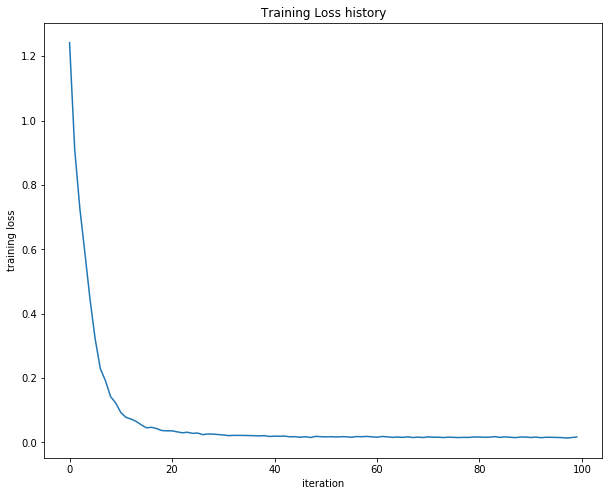

In [37]:
net = init_toy_model()
stats = net.train(X, y, X, y,
            learning_rate=1e-1, reg=5e-6,
            num_iters=100, verbose=False)

print('Final training loss: ', stats['loss_history'][-1])

# plot the loss history
plt.plot(stats['loss_history'])
plt.xlabel('iteration')
plt.ylabel('training loss')
plt.title('Training Loss history')
plt.show()

# Load the data
Now that you have implemented a two-layer network that passes gradient checks and works on toy data, it's time to load up our favorite CIFAR-10 data so we can use it to train a classifier on a real dataset.

In [38]:
from cs231n.data_utils import load_CIFAR10

def get_CIFAR10_data(num_training=49000, num_validation=1000, num_test=1000):
    """
    Load the CIFAR-10 dataset from disk and perform preprocessing to prepare
    it for the two-layer neural net classifier. These are the same steps as
    we used for the SVM, but condensed to a single function.  
    """
    # Load the raw CIFAR-10 data
    cifar10_dir = 'cs231n/datasets/cifar-10-batches-py'
    
    X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)
        
    # Subsample the data
    mask = list(range(num_training, num_training + num_validation))
    X_val = X_train[mask]
    y_val = y_train[mask]
    mask = list(range(num_training))
    X_train = X_train[mask]
    y_train = y_train[mask]
    mask = list(range(num_test))
    X_test = X_test[mask]
    y_test = y_test[mask]

    # Normalize the data: subtract the mean image
    mean_image = np.mean(X_train, axis=0)
    X_train -= mean_image
    X_val -= mean_image
    X_test -= mean_image

    # Reshape data to rows
    X_train = X_train.reshape(num_training, -1)
    X_val = X_val.reshape(num_validation, -1)
    X_test = X_test.reshape(num_test, -1)

    return X_train, y_train, X_val, y_val, X_test, y_test


# Cleaning up variables to prevent loading data multiple times (which may cause memory issue)
try:
   del X_train, y_train
   del X_test, y_test
   print('Clear previously loaded data.')
except:
   pass

# Invoke the above function to get our data.
X_train, y_train, X_val, y_val, X_test, y_test = get_CIFAR10_data()
print('Train data shape: ', X_train.shape)
print('Train labels shape: ', y_train.shape)
print('Validation data shape: ', X_val.shape)
print('Validation labels shape: ', y_val.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Clear previously loaded data.
Train data shape:  (49000, 3072)
Train labels shape:  (49000,)
Validation data shape:  (1000, 3072)
Validation labels shape:  (1000,)
Test data shape:  (1000, 3072)
Test labels shape:  (1000,)


# Train a network
To train our network we will use SGD. In addition, we will adjust the learning rate with an exponential learning rate schedule as optimization proceeds; after each epoch, we will reduce the learning rate by multiplying it by a decay rate.

In [39]:
input_size = 32 * 32 * 3
hidden_size = 50
num_classes = 10
net = TwoLayerNet(input_size, hidden_size, num_classes)

# Train the network
stats = net.train(X_train, y_train, X_val, y_val,
            num_iters=1000, batch_size=200,
            learning_rate=1e-4, learning_rate_decay=0.95,
            reg=0.25, verbose=True)

# Predict on the validation set
val_acc = (net.predict(X_val) == y_val).mean()
print('Validation accuracy: ', val_acc)



iteration 0 / 1000: loss 2.302762
iteration 100 / 1000: loss 2.302725
iteration 200 / 1000: loss 2.302729
iteration 300 / 1000: loss 2.302747
iteration 400 / 1000: loss 2.302740
iteration 500 / 1000: loss 2.302750
iteration 600 / 1000: loss 2.302743
iteration 700 / 1000: loss 2.302729
iteration 800 / 1000: loss 2.302732
iteration 900 / 1000: loss 2.302746
Validation accuracy:  0.144


# Debug the training
With the default parameters we provided above, you should get a validation accuracy of about 0.29 on the validation set. This isn't very good.

One strategy for getting insight into what's wrong is to plot the loss function and the accuracies on the training and validation sets during optimization.

Another strategy is to visualize the weights that were learned in the first layer of the network. In most neural networks trained on visual data, the first layer weights typically show some visible structure when visualized.

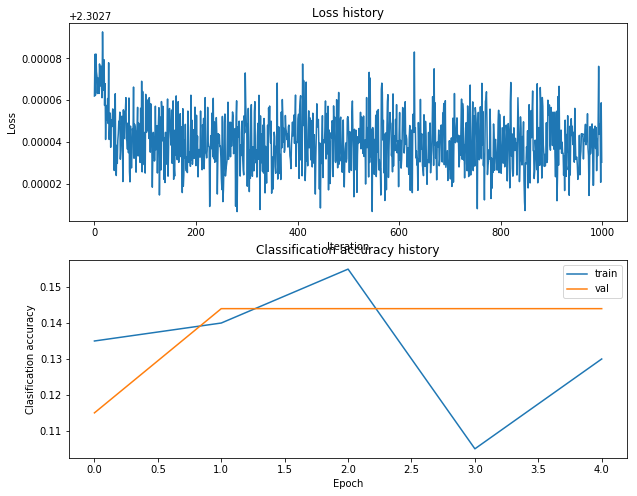

In [40]:
# Plot the loss function and train / validation accuracies
plt.subplot(2, 1, 1)
plt.plot(stats['loss_history'])
plt.title('Loss history')
plt.xlabel('Iteration')
plt.ylabel('Loss')

plt.subplot(2, 1, 2)
plt.plot(stats['train_acc_history'], label='train')
plt.plot(stats['val_acc_history'], label='val')
plt.title('Classification accuracy history')
plt.xlabel('Epoch')
plt.ylabel('Clasification accuracy')
plt.legend()
plt.show()

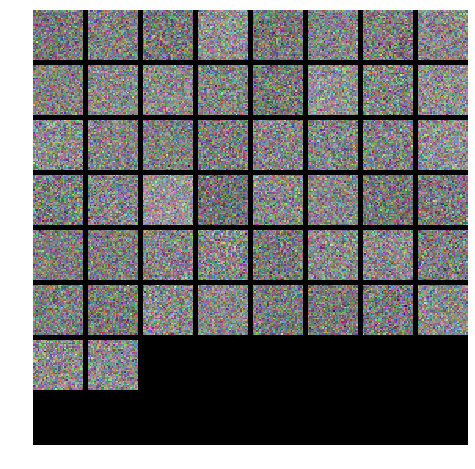

In [41]:
from cs231n.vis_utils import visualize_grid

# Visualize the weights of the network

def show_net_weights(net):
    W1 = net.params['W1']
    W1 = W1.reshape(32, 32, 3, -1).transpose(3, 0, 1, 2)
    plt.imshow(visualize_grid(W1, padding=3).astype('uint8'))
    plt.gca().axis('off')
    plt.show()

show_net_weights(net)

# Tune your hyperparameters

**What's wrong?**. Looking at the visualizations above, we see that the loss is decreasing more or less linearly, which seems to suggest that the learning rate may be too low. Moreover, there is no gap between the training and validation accuracy, suggesting that the model we used has low capacity, and that we should increase its size. On the other hand, with a very large model we would expect to see more overfitting, which would manifest itself as a very large gap between the training and validation accuracy.

**Tuning**. Tuning the hyperparameters and developing intuition for how they affect the final performance is a large part of using Neural Networks, so we want you to get a lot of practice. Below, you should experiment with different values of the various hyperparameters, including hidden layer size, learning rate, numer of training epochs, and regularization strength. You might also consider tuning the learning rate decay, but you should be able to get good performance using the default value.

**Approximate results**. You should be aim to achieve a classification accuracy of greater than 48% on the validation set. Our best network gets over 52% on the validation set.

**Experiment**: You goal in this exercise is to get as good of a result on CIFAR-10 as you can, with a fully-connected Neural Network. Feel free implement your own techniques (e.g. PCA to reduce dimensionality, or adding dropout, or adding features to the solver, etc.).

In [47]:
best_net = None # store the best model into this 

#################################################################################
# TODO: Tune hyperparameters using the validation set. Store your best trained  #
# model in best_net.                                                            #
#                                                                               #
# To help debug your network, it may help to use visualizations similar to the  #
# ones we used above; these visualizations will have significant qualitative    #
# differences from the ones we saw above for the poorly tuned network.          #
#                                                                               #
# Tweaking hyperparameters by hand can be fun, but you might find it useful to  #
# write code to sweep through possible combinations of hyperparameters          #
# automatically like we did on the previous exercises.                          #
#################################################################################
# tuning: 1) hidden layer size 2) learning rate 3) number of training epochs 4) regularization strength 5) learning rate of decay (optional)
N = 3072
C = 10
#h_layer_sizes = range(50, N, 50)
#batch_sizes = range(100, 200, 10)
#learning_rates = range(1e-4, 1e-1, .10)
h_layer_sizes = [50, 100, 150, 200]
batch_sizes = [100, 125, 150, 200]
learning_rates = [1e-4, 1e-3, 1e-2, 1e-1]
regularization_strengths = [2.5e-4, 5e-4, 5e-5, 5e-6]
best_val_acc = -1.0
for h_s in h_layer_sizes:
    for bs in batch_sizes:
        for lr in learning_rates:
            for rs in regularization_strengths:
                print('Hidden Layer Size: %s' %h_s)
                print('Batch size: %s' %bs)
                print('Learning Rate: %s' %lr)
                print('Regularization Strength: %s' %rs)
                net = TwoLayerNet(N, h_s, C, std=1e-4)
                stats = net.train(X_train, y_train, X_val, y_val,
                            num_iters=1000, batch_size=bs,
                            learning_rate=lr, learning_rate_decay=0.95,
                            reg=rs, verbose=True)
                val_acc = stats['val_acc_history'][-1]
                print(val_acc)
                if (val_acc > best_val_acc):
                    best_val_acc = val_acc
                    best_net = net
                    print('NEW BEST')

def showStats(stats):          
    print('Final training loss: ', stats['loss_history'][-1])

    # plot the loss history
    plt.plot(stats['val_acc_history'])
    plt.xlabel('iteration')
    plt.ylabel('training loss')
    plt.title('Training Loss history')
    plt.show()

#################################################################################
#                               END OF YOUR CODE                                #
#################################################################################

Hidden Layer Size: 50
Batch size: 100
Learning Rate: 0.0001
Regularization Strength: 0.00025
iteration 0 / 1000: loss 2.302588
iteration 100 / 1000: loss 2.302558
iteration 200 / 1000: loss 2.302528
iteration 300 / 1000: loss 2.302499
iteration 400 / 1000: loss 2.302541
iteration 500 / 1000: loss 2.302525
iteration 600 / 1000: loss 2.302497
iteration 700 / 1000: loss 2.302530
iteration 800 / 1000: loss 2.302509
iteration 900 / 1000: loss 2.302527
0.149
NEW BEST
Hidden Layer Size: 50
Batch size: 100
Learning Rate: 0.0001
Regularization Strength: 0.0005
iteration 0 / 1000: loss 2.302580
iteration 100 / 1000: loss 2.302542
iteration 200 / 1000: loss 2.302559
iteration 300 / 1000: loss 2.302562
iteration 400 / 1000: loss 2.302563
iteration 500 / 1000: loss 2.302566
iteration 600 / 1000: loss 2.302543
iteration 700 / 1000: loss 2.302537
iteration 800 / 1000: loss 2.302551
iteration 900 / 1000: loss 2.302545
0.152
NEW BEST
Hidden Layer Size: 50
Batch size: 100
Learning Rate: 0.0001
Regulariz

iteration 500 / 1000: loss 2.302554
iteration 600 / 1000: loss 2.302578
iteration 700 / 1000: loss 2.302543
iteration 800 / 1000: loss 2.302543
iteration 900 / 1000: loss 2.302574
0.133
Hidden Layer Size: 50
Batch size: 125
Learning Rate: 0.0001
Regularization Strength: 5e-06
iteration 0 / 1000: loss 2.302597
iteration 100 / 1000: loss 2.302568
iteration 200 / 1000: loss 2.302588
iteration 300 / 1000: loss 2.302581
iteration 400 / 1000: loss 2.302550
iteration 500 / 1000: loss 2.302550
iteration 600 / 1000: loss 2.302564
iteration 700 / 1000: loss 2.302559
iteration 800 / 1000: loss 2.302554
iteration 900 / 1000: loss 2.302564
0.135
Hidden Layer Size: 50
Batch size: 125
Learning Rate: 0.001
Regularization Strength: 0.00025
iteration 0 / 1000: loss 2.302577
iteration 100 / 1000: loss 2.296952
iteration 200 / 1000: loss 2.296350
iteration 300 / 1000: loss 2.298756
iteration 400 / 1000: loss 2.297253
iteration 500 / 1000: loss 2.298145
iteration 600 / 1000: loss 2.297180
iteration 700 / 1

iteration 100 / 1000: loss 2.298186
iteration 200 / 1000: loss 2.299826
iteration 300 / 1000: loss 2.298547
iteration 400 / 1000: loss 2.295497
iteration 500 / 1000: loss 2.297146
iteration 600 / 1000: loss 2.299507
iteration 700 / 1000: loss 2.298023
iteration 800 / 1000: loss 2.296949
iteration 900 / 1000: loss 2.297097
0.113
Hidden Layer Size: 50
Batch size: 150
Learning Rate: 0.001
Regularization Strength: 5e-05
iteration 0 / 1000: loss 2.302608
iteration 100 / 1000: loss 2.299430
iteration 200 / 1000: loss 2.296604
iteration 300 / 1000: loss 2.298603
iteration 400 / 1000: loss 2.298255
iteration 500 / 1000: loss 2.298255
iteration 600 / 1000: loss 2.298445
iteration 700 / 1000: loss 2.299123
iteration 800 / 1000: loss 2.298248
iteration 900 / 1000: loss 2.297740
0.101
Hidden Layer Size: 50
Batch size: 150
Learning Rate: 0.001
Regularization Strength: 5e-06
iteration 0 / 1000: loss 2.302579
iteration 100 / 1000: loss 2.297017
iteration 200 / 1000: loss 2.295146
iteration 300 / 1000

iteration 800 / 1000: loss 2.296732
iteration 900 / 1000: loss 2.300296
0.202
Hidden Layer Size: 50
Batch size: 200
Learning Rate: 0.01
Regularization Strength: 0.00025
iteration 0 / 1000: loss 2.302570
iteration 100 / 1000: loss 1.737735
iteration 200 / 1000: loss 1.759519
iteration 300 / 1000: loss 1.755627
iteration 400 / 1000: loss 1.878404
iteration 500 / 1000: loss 1.739931
iteration 600 / 1000: loss 1.771989
iteration 700 / 1000: loss 1.686746
iteration 800 / 1000: loss 1.727827
iteration 900 / 1000: loss 1.761774
0.366
Hidden Layer Size: 50
Batch size: 200
Learning Rate: 0.01
Regularization Strength: 0.0005
iteration 0 / 1000: loss 2.302584
iteration 100 / 1000: loss 1.793398
iteration 200 / 1000: loss 1.803235
iteration 300 / 1000: loss 1.837091
iteration 400 / 1000: loss 1.790302
iteration 500 / 1000: loss 1.823594
iteration 600 / 1000: loss 1.689543
iteration 700 / 1000: loss 1.748540
iteration 800 / 1000: loss 1.683591
iteration 900 / 1000: loss 1.764115
0.368
Hidden Layer 

iteration 200 / 1000: loss nan
iteration 300 / 1000: loss nan
iteration 400 / 1000: loss nan
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan
0.087
Hidden Layer Size: 100
Batch size: 100
Learning Rate: 0.01
Regularization Strength: 5e-06
iteration 0 / 1000: loss 2.302627
iteration 100 / 1000: loss nan
iteration 200 / 1000: loss nan
iteration 300 / 1000: loss nan
iteration 400 / 1000: loss nan
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan
0.087
Hidden Layer Size: 100
Batch size: 100
Learning Rate: 0.1
Regularization Strength: 0.00025
iteration 0 / 1000: loss 2.302574
iteration 100 / 1000: loss nan
iteration 200 / 1000: loss nan
iteration 300 / 1000: loss nan
iteration 400 / 1000: loss nan
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss

iteration 200 / 1000: loss nan
iteration 300 / 1000: loss nan
iteration 400 / 1000: loss nan
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan
0.087
Hidden Layer Size: 100
Batch size: 125
Learning Rate: 0.1
Regularization Strength: 5e-05
iteration 0 / 1000: loss 2.302539
iteration 100 / 1000: loss nan
iteration 200 / 1000: loss nan
iteration 300 / 1000: loss nan
iteration 400 / 1000: loss nan
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan
0.087
Hidden Layer Size: 100
Batch size: 125
Learning Rate: 0.1
Regularization Strength: 5e-06
iteration 0 / 1000: loss 2.302538
iteration 100 / 1000: loss nan
iteration 200 / 1000: loss nan
iteration 300 / 1000: loss nan
iteration 400 / 1000: loss nan
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss na

iteration 100 / 1000: loss 2.302537
iteration 200 / 1000: loss 2.302498
iteration 300 / 1000: loss 2.302510
iteration 400 / 1000: loss 2.302457
iteration 500 / 1000: loss 2.302494
iteration 600 / 1000: loss 2.302470
iteration 700 / 1000: loss 2.302503
iteration 800 / 1000: loss 2.302509
iteration 900 / 1000: loss 2.302522
0.188
Hidden Layer Size: 100
Batch size: 200
Learning Rate: 0.0001
Regularization Strength: 0.0005
iteration 0 / 1000: loss 2.302580
iteration 100 / 1000: loss 2.302492
iteration 200 / 1000: loss 2.302472
iteration 300 / 1000: loss 2.302449
iteration 400 / 1000: loss 2.302437
iteration 500 / 1000: loss 2.302443
iteration 600 / 1000: loss 2.302472
iteration 700 / 1000: loss 2.302484
iteration 800 / 1000: loss 2.302423
iteration 900 / 1000: loss 2.302442
0.192
Hidden Layer Size: 100
Batch size: 200
Learning Rate: 0.0001
Regularization Strength: 5e-05
iteration 0 / 1000: loss 2.302554
iteration 100 / 1000: loss 2.302442
iteration 200 / 1000: loss 2.302403
iteration 300 /

iteration 600 / 1000: loss 2.302400
iteration 700 / 1000: loss 2.302391
iteration 800 / 1000: loss 2.302353
iteration 900 / 1000: loss 2.302333
0.191
Hidden Layer Size: 150
Batch size: 100
Learning Rate: 0.0001
Regularization Strength: 5e-06
iteration 0 / 1000: loss 2.302627
iteration 100 / 1000: loss 2.302412
iteration 200 / 1000: loss 2.302491
iteration 300 / 1000: loss 2.302486
iteration 400 / 1000: loss 2.302457
iteration 500 / 1000: loss 2.302523
iteration 600 / 1000: loss 2.302504
iteration 700 / 1000: loss 2.302545
iteration 800 / 1000: loss 2.302365
iteration 900 / 1000: loss 2.302519
0.181
Hidden Layer Size: 150
Batch size: 100
Learning Rate: 0.001
Regularization Strength: 0.00025
iteration 0 / 1000: loss 2.302576
iteration 100 / 1000: loss 2.295120
iteration 200 / 1000: loss 2.291023
iteration 300 / 1000: loss 2.289851
iteration 400 / 1000: loss 2.289633
iteration 500 / 1000: loss 2.291246
iteration 600 / 1000: loss 2.292473
iteration 700 / 1000: loss 2.289036
iteration 800 /

iteration 100 / 1000: loss 2.291831
iteration 200 / 1000: loss 2.283078
iteration 300 / 1000: loss 2.286049
iteration 400 / 1000: loss 2.279692
iteration 500 / 1000: loss 2.284777
iteration 600 / 1000: loss 2.279238
iteration 700 / 1000: loss 2.280913
iteration 800 / 1000: loss 2.285834
iteration 900 / 1000: loss 2.285997
0.201
Hidden Layer Size: 150
Batch size: 125
Learning Rate: 0.001
Regularization Strength: 5e-05
iteration 0 / 1000: loss 2.302578
iteration 100 / 1000: loss 2.293753
iteration 200 / 1000: loss 2.294554
iteration 300 / 1000: loss 2.288651
iteration 400 / 1000: loss 2.293469
iteration 500 / 1000: loss 2.291703
iteration 600 / 1000: loss 2.292808
iteration 700 / 1000: loss 2.289701
iteration 800 / 1000: loss 2.289744
iteration 900 / 1000: loss 2.289822
0.173
Hidden Layer Size: 150
Batch size: 125
Learning Rate: 0.001
Regularization Strength: 5e-06
iteration 0 / 1000: loss 2.302605
iteration 100 / 1000: loss 2.287779
iteration 200 / 1000: loss 2.289614
iteration 300 / 10

iteration 100 / 1000: loss nan
iteration 200 / 1000: loss nan
iteration 300 / 1000: loss nan
iteration 400 / 1000: loss nan
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan
0.144
Hidden Layer Size: 150
Batch size: 150
Learning Rate: 0.01
Regularization Strength: 0.0005
iteration 0 / 1000: loss 2.302624
iteration 100 / 1000: loss nan
iteration 200 / 1000: loss nan
iteration 300 / 1000: loss nan
iteration 400 / 1000: loss nan
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan
0.159
Hidden Layer Size: 150
Batch size: 150
Learning Rate: 0.01
Regularization Strength: 5e-05
iteration 0 / 1000: loss 2.302566
iteration 100 / 1000: loss nan
iteration 200 / 1000: loss nan
iteration 300 / 1000: loss nan
iteration 400 / 1000: loss nan
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss

iteration 100 / 1000: loss 1.794572
iteration 200 / 1000: loss 1.783363
iteration 300 / 1000: loss 1.729398
iteration 400 / 1000: loss 1.743406
iteration 500 / 1000: loss 1.629238
iteration 600 / 1000: loss 1.745350
iteration 700 / 1000: loss 1.726263
iteration 800 / 1000: loss 1.765728
iteration 900 / 1000: loss 1.722953
0.373
Hidden Layer Size: 150
Batch size: 200
Learning Rate: 0.1
Regularization Strength: 0.00025
iteration 0 / 1000: loss 2.302567
iteration 100 / 1000: loss nan
iteration 200 / 1000: loss nan
iteration 300 / 1000: loss nan
iteration 400 / 1000: loss nan
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan
0.087
Hidden Layer Size: 150
Batch size: 200
Learning Rate: 0.1
Regularization Strength: 0.0005
iteration 0 / 1000: loss 2.302585
iteration 100 / 1000: loss nan
iteration 200 / 1000: loss nan
iteration 300 / 1000: loss nan
iteration 400 / 1000: loss nan
iteration 50

iteration 100 / 1000: loss nan
iteration 200 / 1000: loss nan
iteration 300 / 1000: loss nan
iteration 400 / 1000: loss nan
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan
0.087
Hidden Layer Size: 200
Batch size: 100
Learning Rate: 0.1
Regularization Strength: 5e-06
iteration 0 / 1000: loss 2.302625
iteration 100 / 1000: loss nan
iteration 200 / 1000: loss nan
iteration 300 / 1000: loss nan
iteration 400 / 1000: loss nan
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan
0.087
Hidden Layer Size: 200
Batch size: 125
Learning Rate: 0.0001
Regularization Strength: 0.00025
iteration 0 / 1000: loss 2.302572
iteration 100 / 1000: loss 2.302334
iteration 200 / 1000: loss 2.302398
iteration 300 / 1000: loss 2.302464
iteration 400 / 1000: loss 2.302392
iteration 500 / 1000: loss 2.302419

iteration 100 / 1000: loss 2.302405
iteration 200 / 1000: loss 2.302375
iteration 300 / 1000: loss 2.302367
iteration 400 / 1000: loss 2.302433
iteration 500 / 1000: loss 2.302326
iteration 600 / 1000: loss 2.302386
iteration 700 / 1000: loss 2.302375
iteration 800 / 1000: loss 2.302320
iteration 900 / 1000: loss 2.302351
0.124
Hidden Layer Size: 200
Batch size: 150
Learning Rate: 0.0001
Regularization Strength: 5e-05
iteration 0 / 1000: loss 2.302665
iteration 100 / 1000: loss 2.302356
iteration 200 / 1000: loss 2.302409
iteration 300 / 1000: loss 2.302495
iteration 400 / 1000: loss 2.302391
iteration 500 / 1000: loss 2.302347
iteration 600 / 1000: loss 2.302458
iteration 700 / 1000: loss 2.302441
iteration 800 / 1000: loss 2.302407
iteration 900 / 1000: loss 2.302414
0.109
Hidden Layer Size: 200
Batch size: 150
Learning Rate: 0.0001
Regularization Strength: 5e-06
iteration 0 / 1000: loss 2.302625
iteration 100 / 1000: loss 2.302409
iteration 200 / 1000: loss 2.302370
iteration 300 / 

0.14
Hidden Layer Size: 200
Batch size: 200
Learning Rate: 0.001
Regularization Strength: 0.00025
iteration 0 / 1000: loss 2.302598
iteration 100 / 1000: loss 2.283791
iteration 200 / 1000: loss 2.284969
iteration 300 / 1000: loss 2.281418
iteration 400 / 1000: loss 2.285371
iteration 500 / 1000: loss 2.290565
iteration 600 / 1000: loss 2.284159
iteration 700 / 1000: loss 2.283102
iteration 800 / 1000: loss 2.290814
iteration 900 / 1000: loss 2.283402
0.205
Hidden Layer Size: 200
Batch size: 200
Learning Rate: 0.001
Regularization Strength: 0.0005
iteration 0 / 1000: loss 2.302507
iteration 100 / 1000: loss 2.280661
iteration 200 / 1000: loss 2.279414
iteration 300 / 1000: loss 2.282325
iteration 400 / 1000: loss 2.277769
iteration 500 / 1000: loss 2.275919
iteration 600 / 1000: loss 2.293191
iteration 700 / 1000: loss 2.284190
iteration 800 / 1000: loss 2.275242
iteration 900 / 1000: loss 2.280941
0.179
Hidden Layer Size: 200
Batch size: 200
Learning Rate: 0.001
Regularization Strengt

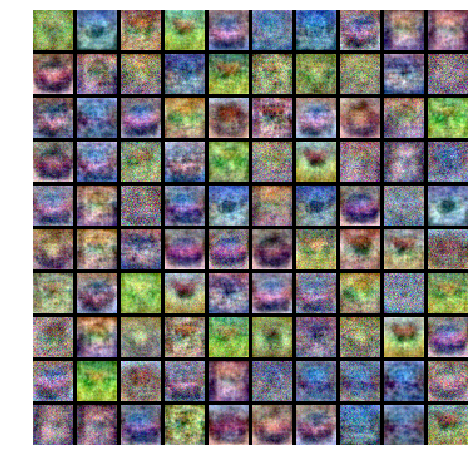

In [48]:
# visualize the weights of the best network
show_net_weights(best_net)

# Run on the test set
When you are done experimenting, you should evaluate your final trained network on the test set; you should get above 48%.

In [49]:
test_acc = (best_net.predict(X_test) == y_test).mean()
print('Test accuracy: ', test_acc)

Test accuracy:  0.353


**Inline Question**

Now that you have trained a Neural Network classifier, you may find that your testing accuracy is much lower than the training accuracy. In what ways can we decrease this gap? Select all that apply.
1. Train on a larger dataset.
2. Add more hidden units.
3. Increase the regularization strength.
4. None of the above.

*Your answer*: 1., 3. (using both together)

*Your explanation:* Training on a larger dataset would help the Learner to adjust the weight sets (and biases) to a point where they are better representations of the classes, and increasing the regularization strength appropriately will help to prevent the Learner from over-fitting to the dataset as it is exposed to more and more images/training examples. 